## **Taller 2** | Gráficos y Dijkstra

> **Master's Degree in Data Sciences** | EAFIT University  
> **Course:** Fundamentals of Data Science    
> **Group:** Sara Martinez Rendon (smartiner4@eafit.edu.co) | Heider Zapata (hzapata1@eafit.edu.co) | Yeison Londoño (ylondon4@eafit.edu.co)  
> **Date:** 02/02/2026
---

### **1. Grafique 4 curvas en ventanas separadas**

(Por ejemplo, 4 curvas senoidales de diferente frecuencia). Recuerde crear un vector t que represente el eje del tiempo (coordenada x). Adiciónele atributos a cada curva (por ejemplo, título de la gráfica, nombre del eje x, nombre del eje y, entre otros).

In [1]:
#pip install matplotlib

#### Ecuación de una onda senoidal

Recordemos la **ecuación general de una onda senoidal**:

y(t) = A · sin(ωt + θ)


##### Definición de variables

- **\( A \)**: amplitud (valor máximo de la señal)
- **\( t \)**: tiempo
- **\( \omega \)**: frecuencia angular *(rad/s)*  
  \[
  \omega = 2\pi f = \frac{2\pi}{T}
  \]
- **\( f \)**: frecuencia *(Hz)*
- **\( T \)**: período *(s)*
- **\( θ \)**: desfase angular *(en radianes)*



##### Función a graficar

Sustituyendo ω en la ecuación original:

y(t) = A · sin(2π · f · t + θ)


Si asumimos:
- \( A = 1 \)
- \( θ = 0 \)

la función final queda como:

y(t) = sin(2π · f · t)


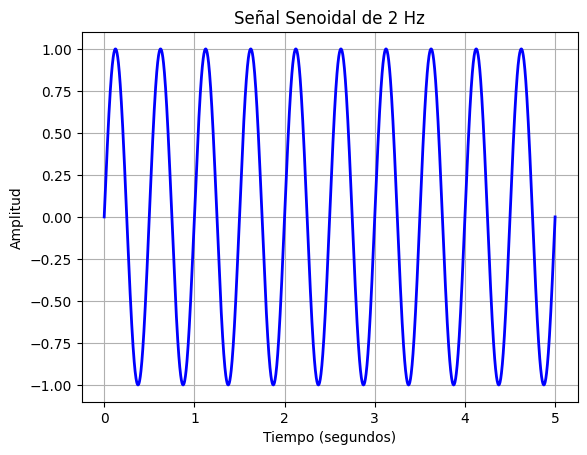

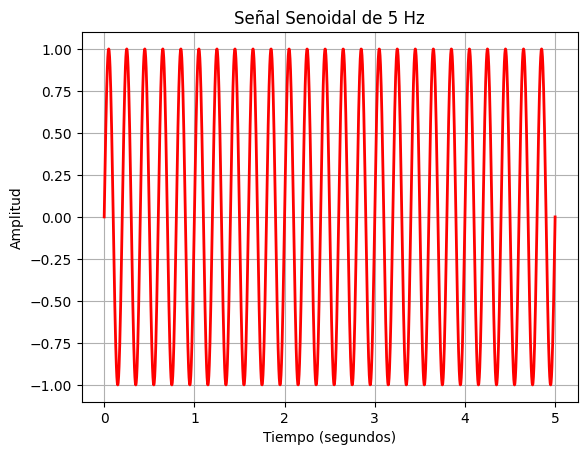

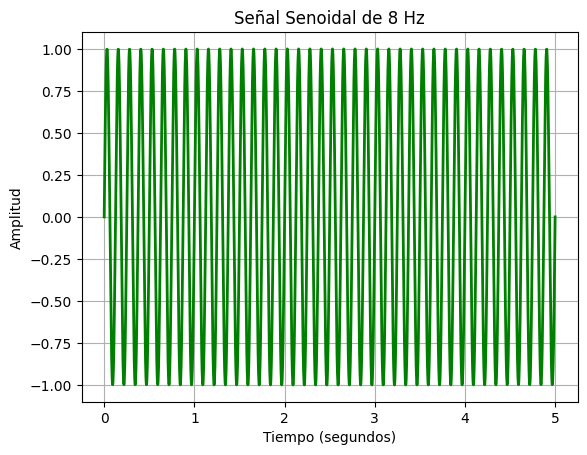

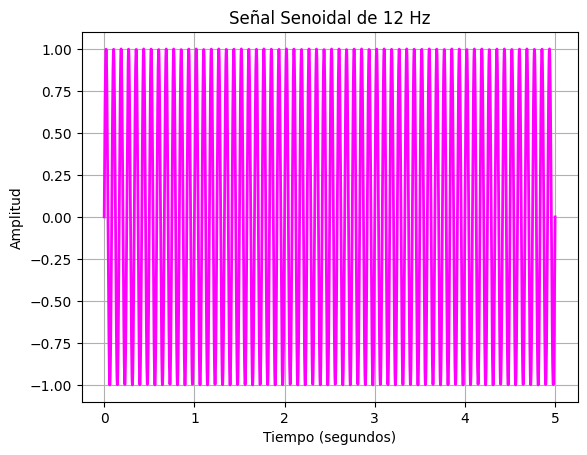

In [2]:
#Importar librerías que usaré

import numpy as np
import matplotlib.pyplot as plt


#Crear el vector t en segundos
t = np.linspace(0, 5,2000) #0 a 5 segundos, con 2000 puntos para alta resolució visualizando las gráficas

#Lista con 4 frecuencias distintas
frecuencias = [2, 5, 8, 12]

#Lista 4 colores distintos
colores = ['blue', 'red', 'green', 'magenta']


#Generar las 4 curvas
for i, f in enumerate(frecuencias): #Usando un for más sofisticado para recorrer la lista más eficientemente
    plt.figure(i + 1)  # Crea una nueva ventana/figura
    
    # Calcular la señal senoidal: y = sin(2 * pi * f * t)
    y = np.sin(2 * np.pi * f * t)
    
    # Graficar
    plt.plot(t, y, color=colores[i], linewidth=2)
    
    # Adición de atributos
    plt.title(f'Señal Senoidal de {f} Hz')
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud')
    plt.grid(True)

# Mostrar todas las ventanas
plt.show()

### **2. Realice el mismo paso anterior, pero use una única ventana, sobreponiendo las curvas.**

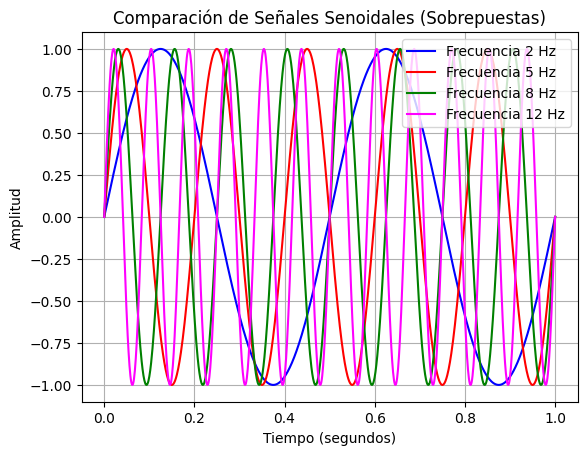

In [3]:
#Conservando las mismas listas
t = np.linspace(0, 1,1000) #0 a 1 segundos para hacer zoom, con 1000 para suavizar.
frecuencias = [2, 5, 8, 12]
colores = ['blue', 'red', 'green', 'magenta']

#Usando for clásico
plt.figure(1)

for i in range(4):
    f = frecuencias[i]
    c = colores[i]
    
    y = np.sin(2 * np.pi * f * t)
    
    # Al llamar a plt.plot repetidamente, se van encimando
    # Agregamos 'label' para que la leyenda sepa qué es cada cosa
    plt.plot(t, y, color=c, label=f'Frecuencia {f} Hz')

#Atributos de la g´rafica unica
plt.title('Comparación de Señales Senoidales (Sobrepuestas)')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')

plt.legend(loc='upper right') #Es lo que permite distinguir los colores, y pone en un cuadrito que significa cada color
plt.grid(True)

plt.show()



### **3. Realice el mismo paso 2, pero en una única ventana, graficando cada curva por separado (use la función ‘subplot’).**

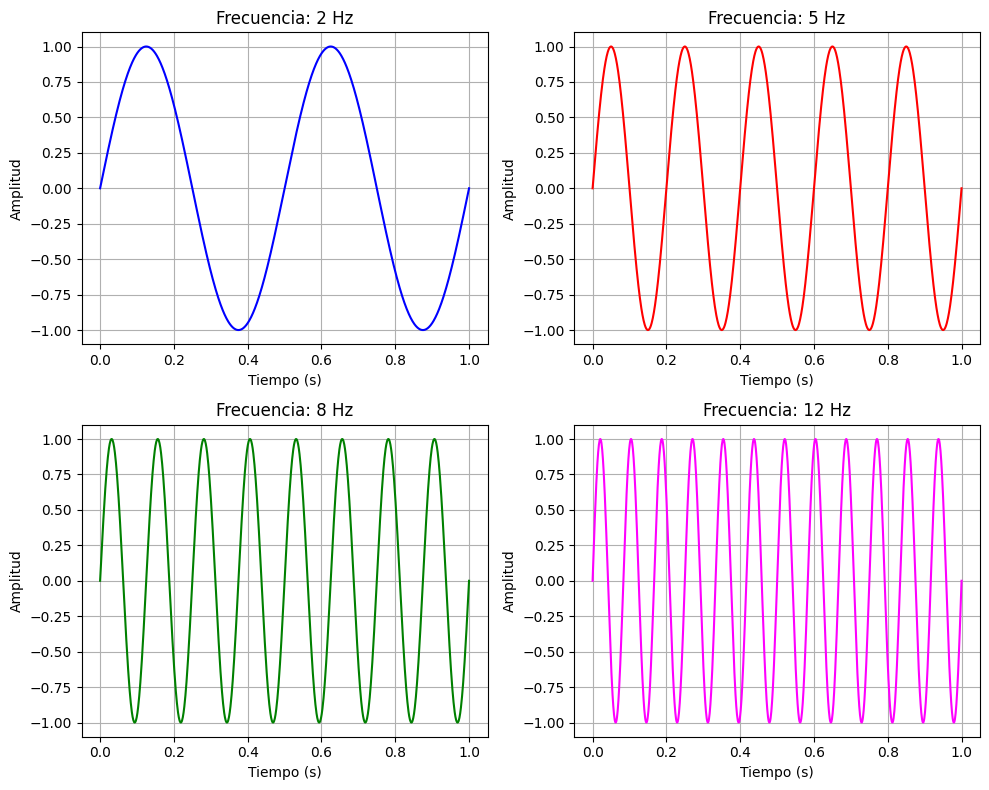

In [4]:
#Conservando las mismas listas
t = np.linspace(0, 1,1000) #0 a 1 segundos para hacer zoom, con 1000 para suavizar.
frecuencias = [2, 5, 8, 12]
colores = ['blue', 'red', 'green', 'magenta']

#Usando for clásico
plt.figure(figsize=(10, 8))

for i in range(4):
    # '221', '222', '223', '224' GRAFICAS ESTILO MATLAB
    # 2 filas, 2 columnas, posición i+1
    plt.subplot(2, 2, i + 1)
    
    y = np.sin(2 * np.pi * frecuencias[i] * t)
    
    plt.plot(t, y, color=colores[i])
    plt.title(f'Frecuencia: {frecuencias[i]} Hz')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()

### **4. Dijkstra**

Realice en Python un programa que dibuje 100 nodos cada uno con posiciones aleatorias en un área de 100mX100m con un radio de comunicaciones de 14m y hallando la ruta de mínimo costo entre un nodo fuente y destino aleatorios. 

Nota:

- El costo de cada enlace (cuando existe enlace) sería la distancia entre el par de nodos correspondiente.  
- Se debe garantizar que el nodo fuente y el nodo destino sean distintos.
- Busque una función que implemente el algoritmo de Dijkstra para encontrar la ruta de mínimo costo 
entre un nodo fuente y un destino.  
- Dibuje los nodos, los números de los nodos, los enlaces de toda la red y la ruta arrojada por el algoritmo de Dijkstra.
- Busque las funciones que sean necesarias para lograr lo que pide el taller.
---

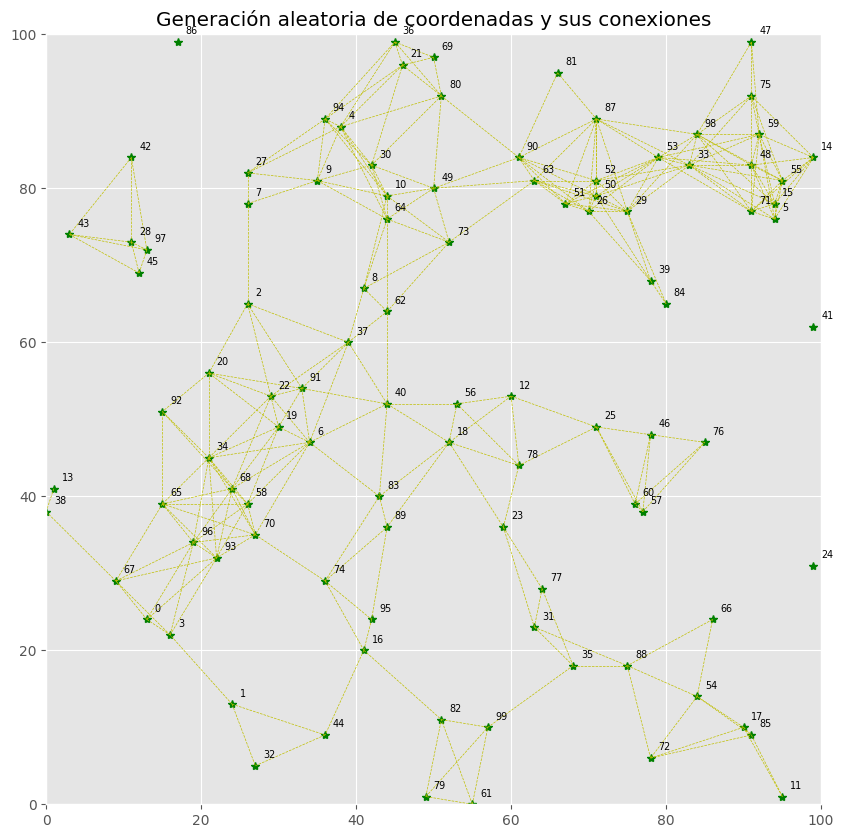

In [17]:
#importo librerías
import matplotlib.pyplot as plt
import numpy as np
import heapq #sirve para implementar colas de prioridad y montículos (heaps) mínimos, permitiendo gestionar de forma eficiente el elemento más pequeño de una lista

#Parámetros
n=100
radio = 14

#lista para almacenar los nodos creados
nodos = []

plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.axis([0,100,0,100])
plt.title("Generación aleatoria de coordenadas y sus conexiones")

# Función de distancia euclidiana (sale de pitágoras)
def distancia(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

#Generación aleatoria de nodos por medio de un ciclo for
for i in range(n):
  x=np.random.randint(0,100)
  y=np.random.randint(0,100)
  #almacentamiento de nodos en variable nodos
  nodos.append((x,y))
  #dibujar cada nodo (x, y) con su número (i) de un tamaño x-small
  plt.text(x+1,y+1,i, size="x-small")
  #dibujar un asterisco verde en cada nodo
  plt.plot(x,y,"g*")

#dibujar conexiones
for i in range (n):
  for j in range(i+1,n):
    d = distancia(nodos[i], nodos[j])
    if d <= radio:
      x1, y1 = nodos[i]
      x2, y2 = nodos[j]
      plt.plot([x1, x2], [y1, y2],"y--", linewidth = 0.5)




Ruta más corta es: [59, 53, 52, 63, 73, 62, 40, 18, 23, 31, 88, 54, 17]
Costo total es: 133.663 metros



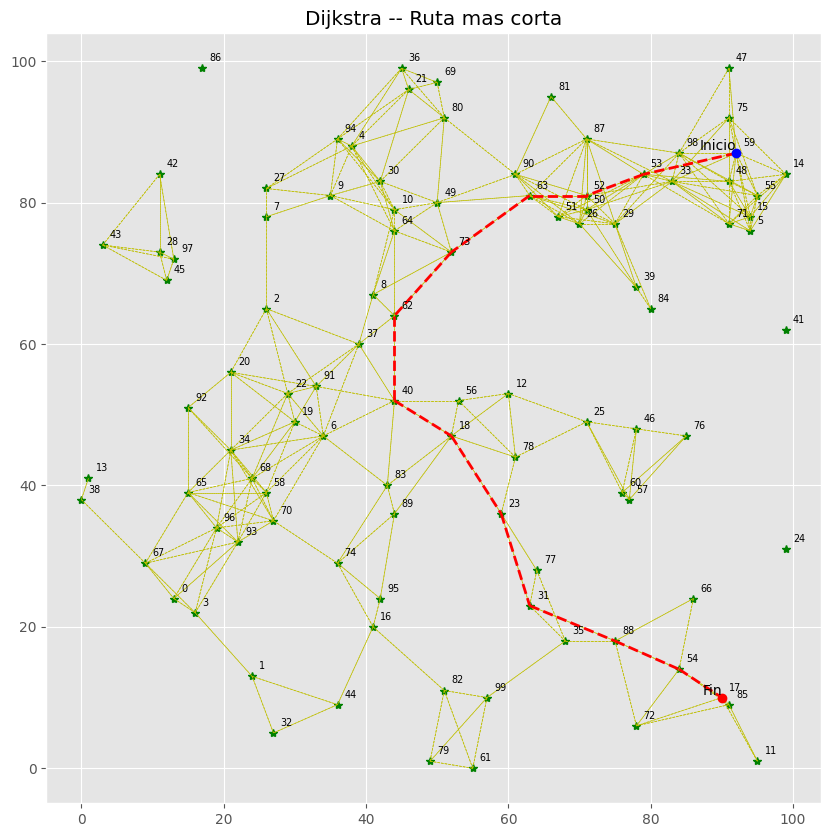

In [19]:


#función Dijkstra
def dijkstra(grafo, inicio, fin):
    cola = []
    heapq.heappush(cola, (0, inicio))

    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[inicio] = 0

    previo = {nodo: None for nodo in grafo}
    visitados = set()

    while cola:
        dist_actual, nodo_actual = heapq.heappop(cola)

        if nodo_actual in visitados:
            continue
        visitados.add(nodo_actual)

        if nodo_actual == fin:
            break

        for vecino, peso in grafo[nodo_actual]:
            nueva_dist = dist_actual + peso
            if nueva_dist < distancias[vecino]:
                distancias[vecino] = nueva_dist
                previo[vecino] = nodo_actual
                heapq.heappush(cola, (nueva_dist, vecino))

    # reconstruir camino
    camino = []
    actual = fin
    while actual is not None:
        camino.append(actual)
        actual = previo[actual]
    camino.reverse()

    return camino, distancias[fin]


#función par construir el grafo
def construir_grafo(nodos, radio):
    grafo = {i: [] for i in range(len(nodos))}

    for i in range(len(nodos)):
        for j in range(len(nodos)):
            if i != j:
                d = distancia(nodos[i], nodos[j])
                if d <= radio:
                    grafo[i].append((j, d))  # (vecino, costo)
    return grafo

# Grafo
grafo = construir_grafo(nodos, radio)

# Dibujar conexiones y volver a repetir asteriscos y numeros
plt.figure(figsize=(10,10))
plt.title("Dijkstra -- Ruta mas corta")
for i in range (n):
    x1, y1 = nodos[i]

    plt.plot(x1, y1, "g*")
    plt.text(x1+1, y1+1, i, size="x-small")


for i in grafo:
    for j, _ in grafo[i]:
        x1, y1 = nodos[i]
        x2, y2 = nodos[j]
        plt.plot([x1, x2], [y1, y2], 'y--', linewidth=0.5)


# Elegir origen y destino
inicio = 59
fin = 17

camino, costo = dijkstra(grafo, inicio, fin)

# Dibujar camino mínimo
for i in range(len(camino)-1):
    x1, y1 = nodos[camino[i]]
    x2, y2 = nodos[camino[i+1]]
    plt.plot([x1, x2], [y1, y2], 'r--', linewidth=2)

plt.plot(*nodos[inicio], 'bo', markersize=6)
plt.text(*nodos[inicio],"Inicio",ha='right', va='bottom')
plt.plot(*nodos[fin], 'ro', markersize=6)
plt.text(*nodos[fin],"Fin", ha='right', va='bottom')

if len(camino)<=1:
  print(f"no hay conexión entre los puntos {inicio} y {fin}")
else:
  print(f"\nRuta más corta es: {camino}")
  print(f"Costo total es: {costo:.3f} metros\n")

plt.show()